<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [29]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import statsmodels.api as sm
import scipy.stats as stats

#### Read the data

Load the csv file and print the first five observations.

In [30]:
# type your code here
df = pd.read_csv("rainfall_prediction.csv")
df.head()

,Obs_Id,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
0,1,3.6,1.0,3.0,14.225,12.333333,82.0,1028.10,0
1,2,0.0,7.2,4.9,23.075,44.333333,69.5,1015.65,1
2,3,0.0,0.6,1.5,10.175,16.666667,87.0,1026.45,0
3,4,0.8,2.4,0.5,19.000,42.666667,89.0,1010.05,1
4,5,40.4,3.0,3.6,18.725,35.333333,81.5,1005.60,0


**The data definition is as follows:** <br>

**Obs_Id:** Observation Id

**Rainfall:** Rainfall recorded in a day (in mm) 

**Evaporation:** Number of field goals made 

**Sunshine:** Number of hours of bright sunshine per day

**Temp:** Temperature in degree C

**Wind_Speed:** Average speed of the wind in km/hour

**Humidity:** Humidity in percentage (%)

**Pressure:** Atmospheric pressure in hpa (hecto Pascals)

**Rain Tomorrow:** Whether it will rain or not(0 = No, it won't rain tomorrow, 1 = Yes, it will rain tomorrow) (target/dependent variable)

Our objective is to predict whether it will rain tomorrow or not.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify and remove the variables in the data which are insignificant for the classification analysis</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# type your code here
df.std()

Obs_Id          438.930518
Rainfall          7.322329
Evaporation       3.639993
Sunshine          3.689090
Temp              6.380897
Wind_Speed        8.653705
Humidity         17.939610
Pressure          6.958099
RainTomorrow      0.393053
dtype: float64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Obs_Id        1520 non-null   int64  
 1   Rainfall      1520 non-null   float64
 2   Evaporation   1520 non-null   float64
 3   Sunshine      1520 non-null   float64
 4   Temp          1520 non-null   float64
 5   Wind_Speed    1520 non-null   float64
 6   Humidity      1520 non-null   float64
 7   Pressure      1520 non-null   float64
 8   RainTomorrow  1520 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 107.0 KB


In [33]:
df_feature = df.drop("RainTomorrow" , axis = 1)

df_target = df["RainTomorrow"]

In [34]:
df_feature.shape

(1520, 8)

In [35]:
df_target.shape

(1520,)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there any record that is recorded more than once? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# type your code here
df_unique = df.drop_duplicates()
df_unique.shape

(1520, 9)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any outliers present in the data? If yes, remove such observations using the quartiles of the variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

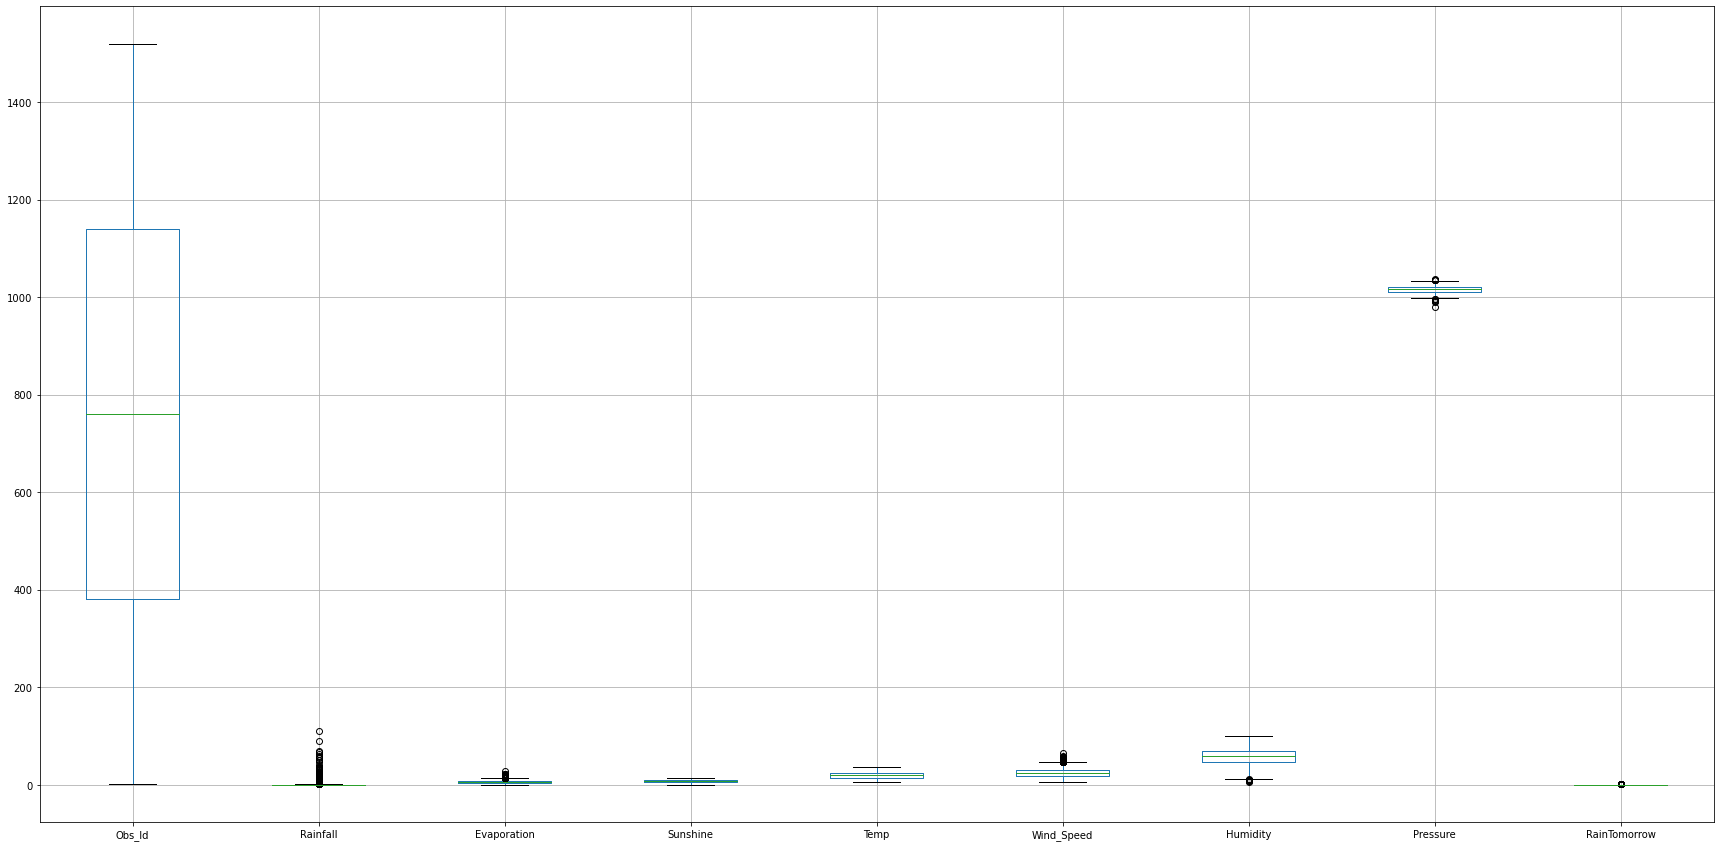

In [37]:
plt.figure(figsize=(30,15))
df.boxplot()
plt.show()

In [38]:
# type your code here
Q1 = df.quantile(0.25)

Q3 = df.quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df_without_out = df[~((df<lower_limit) | (df>upper_limit)).any(axis = 1)]
df_without_out.shape

(989, 9)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is scaling required for the KNN algorithm? If yes, scale the data such that the range of each variable will be between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# type your code here
# Yess,,Scaling is required for KNN algorithm

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

df_feature_scale = mms.fit_transform(df_feature)

df_feature_scale = pd.DataFrame(df_feature_scale , columns = df_feature.columns)

In [46]:
df_feature_scale.head()

,Obs_Id,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure
0,0.000000,0.032847,0.028777,0.214286,0.293281,0.113636,0.808511,0.856510
1,0.000658,0.000000,0.251799,0.350000,0.573123,0.659091,0.675532,0.635961
2,0.001317,0.000000,0.014388,0.107143,0.165217,0.187500,0.861702,0.827281
3,0.001975,0.007299,0.079137,0.035714,0.444269,0.630682,0.882979,0.536758
4,0.002633,0.368613,0.100719,0.257143,0.435573,0.505682,0.803191,0.457927


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a 7-NN model on 70% of the data using the 'Chebyshev' distance and find its accuracy 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# type your code here

X_train_full , X_test_full ,y_train_full ,y_test_full = train_test_split(df_feature_scale, df_target , 
                                                                         test_size=0.3 ,random_state=10)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=7 , metric='chebyshev')

knn_model = knn_model.fit(X_train_full ,y_train_full)

y_pred_k = knn_model.predict(X_test_full)

print("Accuracy: ",accuracy_score(y_test_full ,y_pred_k))

Accuracy:  0.8223684210526315


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the best value of 'K' for the KNN model from the given list of values (use 5-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

K = [3, 5, 7, 9, 11, 13]

In [53]:
# type your code here
from sklearn.model_selection import GridSearchCV

tune_para = [{"n_neighbors" : [3, 5, 7, 9, 11, 13]}]

knn = KNeighborsClassifier()

grid_knn = GridSearchCV(estimator=knn , param_grid=tune_para , cv = 5 , n_jobs=-1)

grid_knn = grid_knn.fit(X_train_full , y_train_full)

print("The best k value for knn model is: " , grid_knn.best_params_ , '\n')

The best k value for knn model is:  {'n_neighbors': 13} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a naive bayes model on 70% of the original data and plot the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
# type your code here

X_train , X_test ,y_train ,y_test = train_test_split(df_feature, df_target , 
                                                                         test_size=0.3 ,random_state=10)

In [55]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()

naive_bayes_model = naive_bayes_model.fit(X_train , y_train)

y_pred_n = naive_bayes_model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test , y_pred_n))

Accuracy:  0.8464912280701754


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which distance metric among 'manhattan', 'euclidean' and 'chebyshev' is suitable for the given dataset? (consider K = 19)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
# type your code here
tuned_para = [{'metric': ['manhattan', 'euclidean','chebyshev']}]

knn = KNeighborsClassifier(n_neighbors=19)

knn_grid = GridSearchCV(estimator=knn , param_grid=tuned_para , cv=5 , n_jobs=-1)

knn_grid = knn_grid.fit(X_train_full ,y_train_full)

print("The best distance parameter is: ",knn_grid.best_params_ , '\n')

The best distance parameter is:  {'metric': 'euclidean'} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the euclidean distance between the first observation of the dataframe 'X_test_scaled' and its five neighboring points in the train set (use for loop)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the parameters obtained in Q8 to build the KNN model, and find the number of false predictions using the test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
# type your code here
from sklearn.metrics import confusion_matrix

In [58]:
knn_model_para = KNeighborsClassifier(metric=knn_grid.best_params_['metric'])

knn_model_para.fit(X_train_full , y_train_full)

y_pred = knn_model_para.predict(X_test_full)

tn , fp , fn , tp = confusion_matrix(y_test_full ,y_pred).ravel()

print("Number of false prediction: " , (fp+fn))

Number of false prediction:  82
